<a href="https://colab.research.google.com/github/auviera/assignment/blob/main/Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [93]:
f=1800 #MHz
f1=900
f2=700
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [97]:
y1=cos(f,loc,tower,user,d)
y2=cos(f,loc2,tower,user,d)
y3=cos(f,loc3,tower,user,d)

In [98]:
d_sort=d[np.argsort(d)]
y1_sort=y1[np.argsort(d)]
y2_sort=y2[np.argsort(d)]
y3_sort=y3[np.argsort(d)]

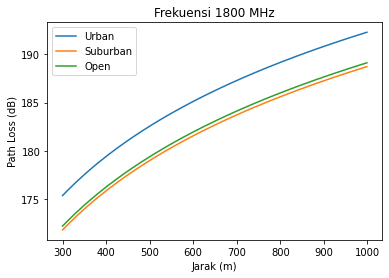

In [99]:
plt.figure()
plt.plot(d_sort,y1_sort, label="Urban")
plt.plot(d_sort,y2_sort, label="Suburban")
plt.plot(d_sort,y3_sort, label="Open")
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

In [100]:
freq1=cos(f,loc,tower,user,d)
freq2=cos(f1,loc,tower,user,d)
freq3=cos(f2,loc,tower,user,d)

In [101]:
d_sort=d[np.argsort(d)]
freq1_sort=freq1[np.argsort(d)]
freq2_sort=freq2[np.argsort(d)]
freq3_sort=freq3[np.argsort(d)]

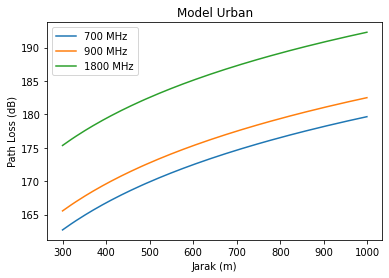

In [102]:
plt.figure()
plt.plot(d_sort,freq3_sort, label="700 MHz")
plt.plot(d_sort,freq2_sort, label="900 MHz")
plt.plot(d_sort,freq1_sort, label="1800 MHz")
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

In [103]:
def powerx(ptx,pl,gtx,grx):
  ptxdb=10*np.log10(ptx*1000) #dbm
  prx = ptxdb - pl + gtx + grx #dbm
  prxn = 10**(prx/10) #numerik

  return prxn

In [104]:
powery1=powerx(30,y1,10,2) #urban
powery2=powerx(30,y2,10,2) #suburban
powery3=powerx(30,y3,10,2) #open

In [105]:
d_sort=d[np.argsort(d)]
powery1_sort=powery1[np.argsort(d)]
powery2_sort=powery2[np.argsort(d)]
powery3_sort=powery3[np.argsort(d)]

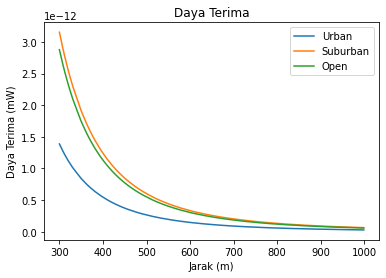

In [106]:
plt.figure()
plt.plot(d_sort,powery1_sort, label="Urban")
plt.plot(d_sort,powery2_sort, label="Suburban")
plt.plot(d_sort,powery3_sort, label="Open")
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.legend()
plt.show()

In [107]:
powerfreq1=powerx(30,freq1,10,2) #freq1800
powerfreq2=powerx(30,freq2,10,2) #freq900
powerfreq3=powerx(30,freq3,10,2) #freq700

In [108]:
d_sort=d[np.argsort(d)]
powerfreq1_sort=powerfreq1[np.argsort(d)]
powerfreq2_sort=powerfreq2[np.argsort(d)]
powerfreq3_sort=powerfreq3[np.argsort(d)]

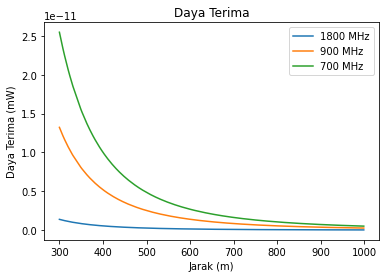

In [109]:
plt.figure()
plt.plot(d_sort,powerfreq1_sort, label="1800 MHz")
plt.plot(d_sort,powerfreq2_sort, label="900 MHz")
plt.plot(d_sort,powerfreq3_sort, label="700 MHz")
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.legend()
plt.show()

In [110]:
def snr(prx,bw):
  bwh = bw*1000000
  noise = (-174) + (10*np.log10(bwh))
  noisen = 10**(noise/10)
  snratio = prx/noisen

  return snratio

In [111]:
snry1 = snr(powery1,5) #urban
snry2 = snr(powery2,5) #suburban
snry3 = snr(powery3,5) #open
snrfreq1 = snr(powerfreq1,5) #freq1800
snrfreq2 = snr(powerfreq2,5) #freq900
snrfreq3 = snr(powerfreq3,5) #freq700

In [112]:
d_sort=d[np.argsort(d)]
snry1_sort=snry1[np.argsort(d)]
snry2_sort=snry2[np.argsort(d)]
snry3_sort=snry3[np.argsort(d)]
snrfreq1_sort=snrfreq1[np.argsort(d)]
snrfreq2_sort=snrfreq2[np.argsort(d)]
snrfreq3_sort=snrfreq3[np.argsort(d)]

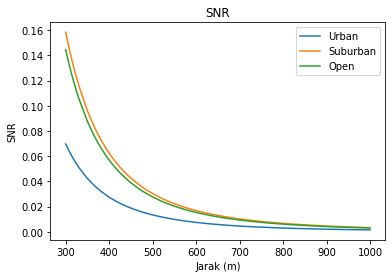

In [115]:
plt.figure()
plt.plot(d_sort,snry1_sort, label="Urban")
plt.plot(d_sort,snry2_sort, label="Suburban")
plt.plot(d_sort,snry3_sort, label="Open")
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.legend()
plt.show()

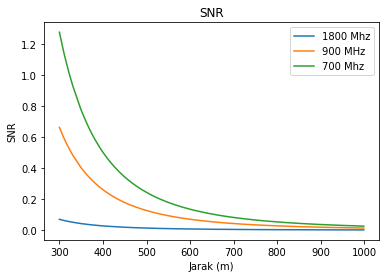

In [117]:
plt.figure()
plt.plot(d_sort,snrfreq1_sort, label="1800 Mhz")
plt.plot(d_sort,snrfreq2_sort, label="900 MHz")
plt.plot(d_sort,snrfreq3_sort, label="700 Mhz")
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.legend()
plt.show()

In [118]:
def kapasitas(snr,bw):
  bwh = bw*1000000
  ks = bwh*(np.log2(1+snr))
  return ks

In [119]:
ksy1 = kapasitas(snry1,5)
ksy2 = kapasitas(snry2,5)
ksy3 = kapasitas(snry3,5)
ksfreq1 = kapasitas(snrfreq1,5)
ksfreq2 = kapasitas(snrfreq2,5)
ksfreq3 = kapasitas(snrfreq3,5)

In [120]:
d_sort=d[np.argsort(d)]
ksy1_sort=ksy1[np.argsort(d)]
ksy2_sort=ksy2[np.argsort(d)]
ksy3_sort=ksy3[np.argsort(d)]
ksfreq1_sort=ksfreq1[np.argsort(d)]
ksfreq2_sort=ksfreq2[np.argsort(d)]
ksfreq3_sort=ksfreq3[np.argsort(d)]

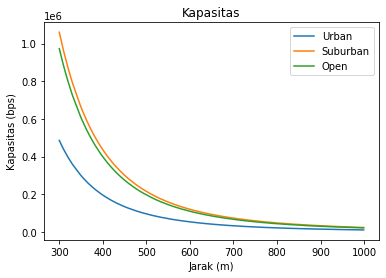

In [121]:
plt.figure()
plt.plot(d_sort,ksy1_sort, label="Urban")
plt.plot(d_sort,ksy2_sort, label="Suburban")
plt.plot(d_sort,ksy3_sort, label="Open")
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()

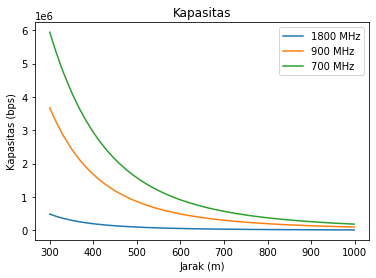

In [123]:
plt.figure()
plt.plot(d_sort,ksfreq1_sort, label="1800 MHz")
plt.plot(d_sort,ksfreq2_sort, label="900 MHz")
plt.plot(d_sort,ksfreq3_sort, label="700 MHz")
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()